<a href="https://colab.research.google.com/github/HiralJain112/Python_notebooks/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        11354 non-null  float64
 1   lng        11354 non-null  float64
 2   desc       11354 non-null  object 
 3   zip        9845 non-null   float64
 4   title      11354 non-null  object 
 5   timeStamp  11354 non-null  object 
 6   twp        11346 non-null  object 
 7   addr       11281 non-null  object 
 8   e          11353 non-null  float64
dtypes: float64(4), object(5)
memory usage: 798.5+ KB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [6]:
df['zip'].value_counts().head(5)

19401.0    806
19464.0    730
19403.0    576
19446.0    564
19406.0    401
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    819
ABINGTON        692
NORRISTOWN      666
UPPER MERION    633
CHELTENHAM      515
Name: twp, dtype: int64

In [8]:
len(df['title'].unique())

84

##OR

In [9]:
df['title'].nunique()

84

In [10]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    2899
Traffic: DISABLED VEHICLE -     768
Fire: FIRE ALARM                649
EMS: RESPIRATORY EMERGENCY      625
EMS: FALL VICTIM                597
                               ... 
EMS: FIRE INVESTIGATION           1
EMS: AMPUTATION                   1
EMS: WARRANT SERVICE              1
EMS: GAS-ODOR/LEAK                1
Fire: RESCUE - TECHNICAL          1
Name: title, Length: 84, dtype: int64

##Make a new column

In [11]:
df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])

In [12]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
11349       Fire
11350    Traffic
11351        EMS
11352       Fire
11353    Traffic
Name: Reason, Length: 11354, dtype: object

##Most common reason

In [13]:
df['Reason'].value_counts().head(1)

EMS    5675
Name: Reason, dtype: int64

##Use seaborn to create a countplot of 911 calls by Reason

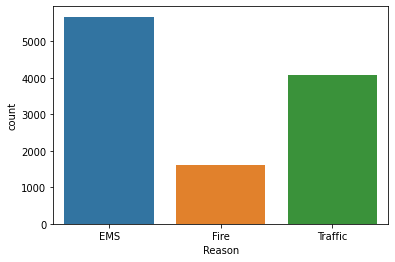

In [14]:
sns.countplot(x='Reason',data=df)

##What is the data type of the objects in the timeStamp column

In [15]:
type(df['timeStamp'].iloc[0]) 

str

##Use pd.to_datetime to convert the column from strings to DateTime objects.

In [16]:
df['timeStamp']= pd.to_datetime(df['timeStamp'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [17]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [19]:
time.year

2015

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [21]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
11349     7
11350     7
11351     7
11352     7
11353     7
Name: Hour, Length: 11354, dtype: int64

In [22]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [23]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
11349     1
11350     1
11351     1
11352     1
11353     1
Name: Month, Length: 11354, dtype: int64

In [24]:
df['DayOfWeek']

0        3
1        3
2        3
3        3
4        3
        ..
11349    6
11350    6
11351    6
11352    6
11353    6
Name: DayOfWeek, Length: 11354, dtype: int64

In [25]:
df['DayOfWeek'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17,12,3


In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

In [29]:
df['DayOfWeek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
11349    Sun
11350    Sun
11351    Sun
11352    Sun
11353    Sun
Name: DayOfWeek, Length: 11354, dtype: object

##Use seaborn to create a countplot of the day of Week column with the hue based off of the Reason column

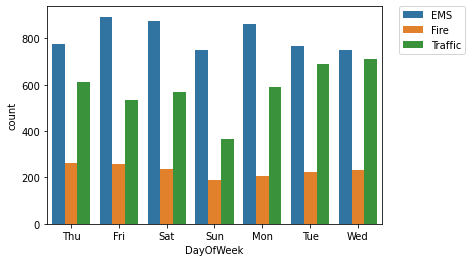

In [30]:
sns.countplot(x='DayOfWeek',data = df,hue='Reason')
#Relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

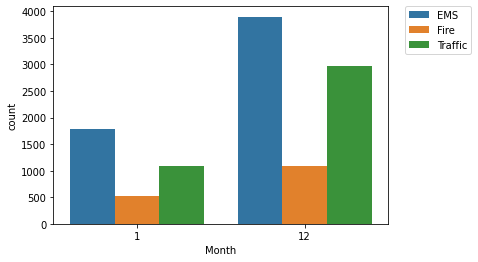

In [31]:
sns.countplot(x='Month',data = df,hue='Reason')
#Relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

##Groupby column month

In [32]:
byMonth = df.groupby('Month').count()

In [33]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,3385,3385,3385,2938,3385,3385,3383,3365,3384,3385,3385,3385
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


##Count of calls per month

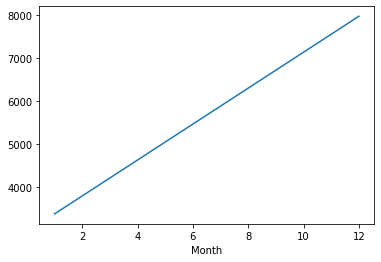

In [34]:
byMonth['lat'].plot()

No handles with labels found to put in legend.


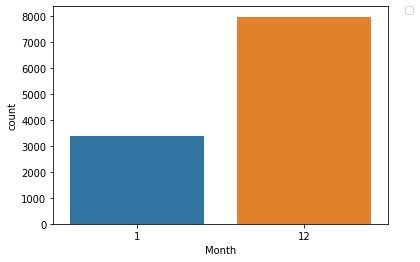

In [35]:
sns.countplot(x='Month',data = df)
#Relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

##Create a linear fit on the number of calls pr month. We may need to reset the index to a column

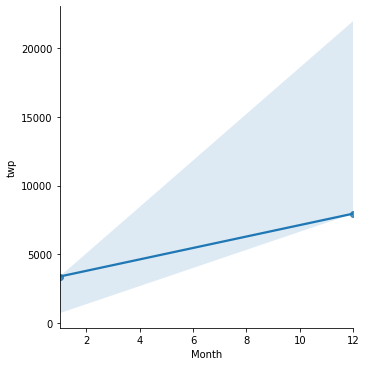

In [36]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

##Create a new column called 'Date' that contains the date from timeStamp column.

In [38]:
t= df['timeStamp'].iloc[0]

In [41]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17,12,Thu,2015-12-10


##groupby the above date column with the count() aggregate and create a plot of counts of 911 calls

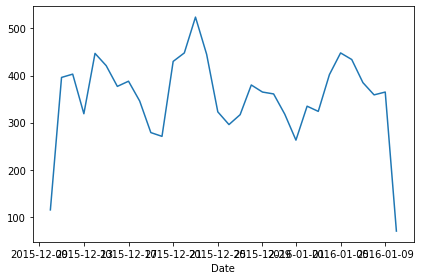

In [46]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

##Recreate the above plot but create 3 seperate plots with each plot representing a reason for the 911 call.

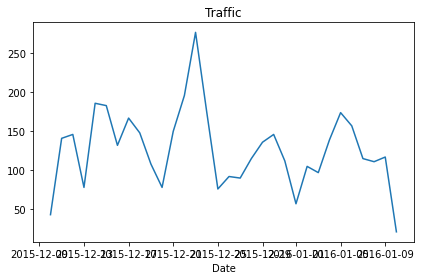

In [48]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

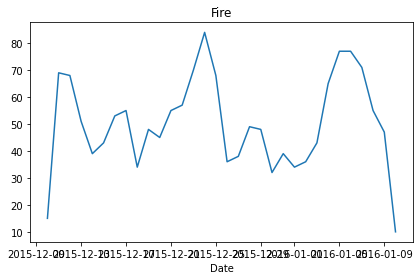

In [49]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

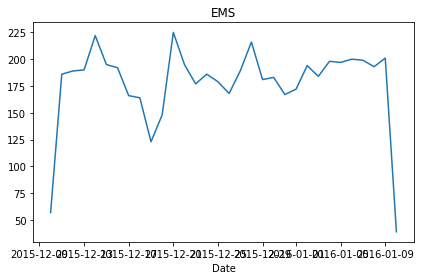

In [50]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        11354 non-null  float64       
 1   lng        11354 non-null  float64       
 2   desc       11354 non-null  object        
 3   zip        9845 non-null   float64       
 4   title      11354 non-null  object        
 5   timeStamp  11354 non-null  datetime64[ns]
 6   twp        11346 non-null  object        
 7   addr       11281 non-null  object        
 8   e          11353 non-null  float64       
 9   Reason     11354 non-null  object        
 10  Hour       11354 non-null  int64         
 11  Month      11354 non-null  int64         
 12  DayOfWeek  11354 non-null  object        
 13  Date       11354 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 1.2+ MB


##Creating Heatmaps

##grouping and displaying information in the form of a matrix

In [64]:
dayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

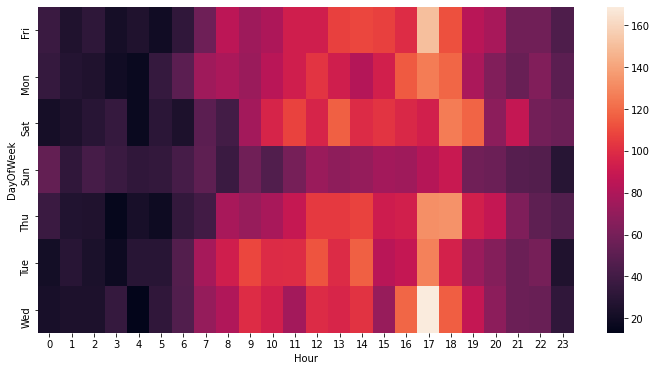

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

##Creating a clustermap

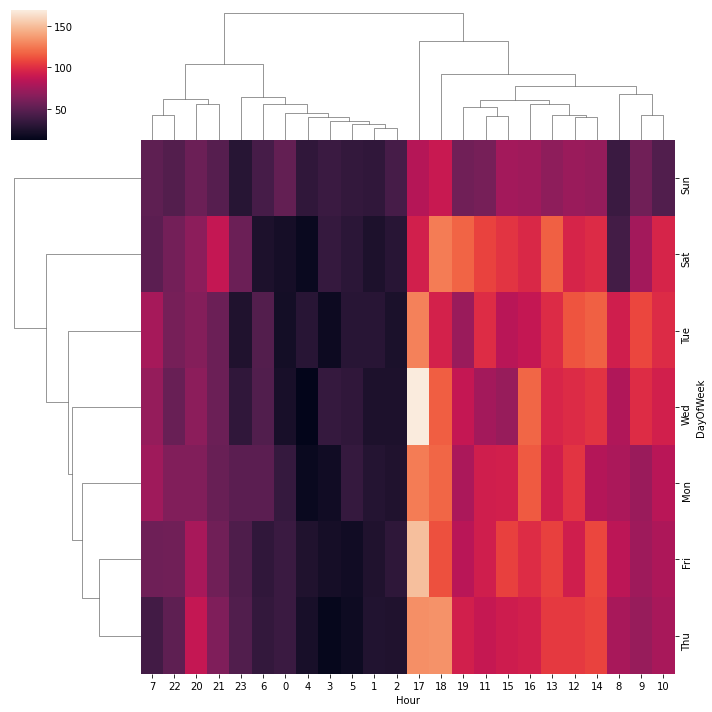

In [66]:
sns.clustermap(dayHour)

##Repeating the above plots for a dataframe that shows the month as the column

In [67]:
dayMonth = df.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,12
DayOfWeek,,
Fri,622,1065
Mon,402,1257
Sat,700,978
Sun,394,907
Thu,385,1266


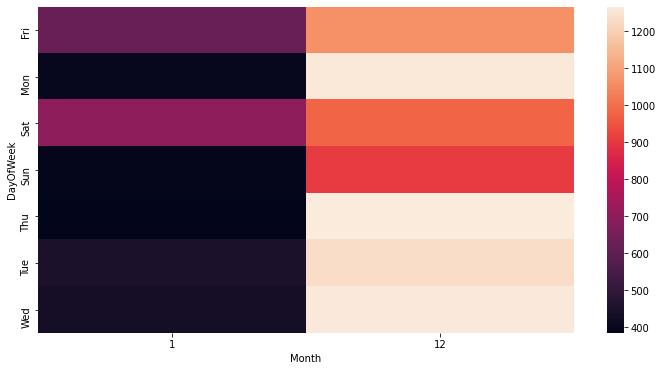

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

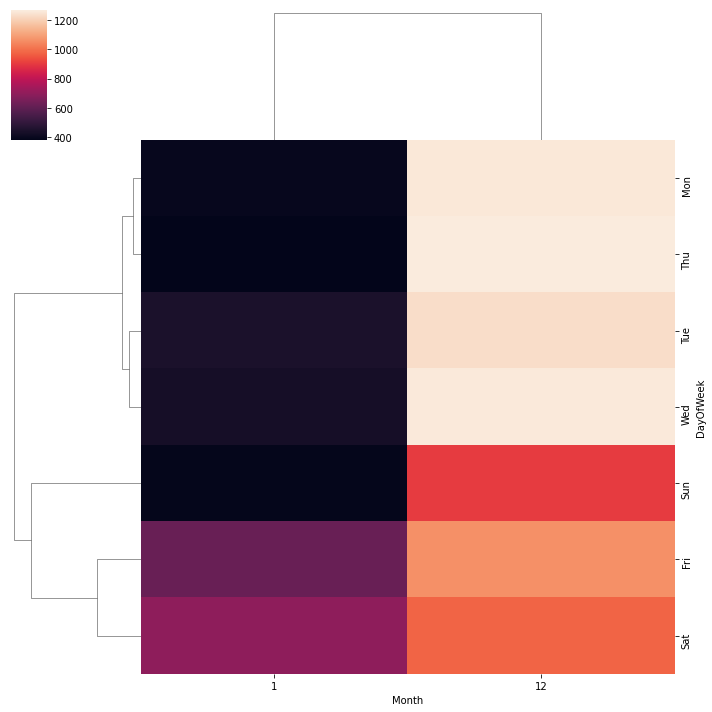

In [63]:
sns.clustermap(dayMonth)